In [3]:
import pandas_datareader.data as pdr
start="1949/5/16"
end="2018/11/30"
N225=pdr.DataReader("NIKKEI225", 'fred', start, end)
N225.head()

,NIKKEI225
DATE,
1949-05-16,176.21
1949-05-17,174.80
1949-05-18,172.53
1949-05-19,171.34
1949-05-20,169.20


In [4]:
N225.tail()

,NIKKEI225
DATE,
2018-11-26,21812.00
2018-11-27,21952.40
2018-11-28,22177.02
2018-11-29,22262.60
2018-11-30,22351.06


Text(0,0.5,'N225 index')

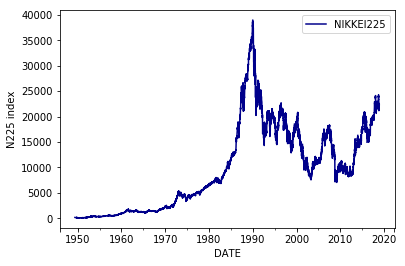

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')

In [7]:
price=pdr.DataReader("^N225", 'yahoo', "1984/1/4",end)
price.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1984-01-04,9927.110352,9927.110352,9927.110352,9927.110352,0.0,9927.110352
1984-01-05,9946.860352,9946.860352,9946.860352,9946.860352,0.0,9946.860352
1984-01-06,9961.250000,9961.250000,9961.250000,9961.250000,0.0,9961.250000
1984-01-09,10053.809570,10053.809570,10053.809570,10053.809570,0.0,10053.809570
1984-01-10,10016.209961,10016.209961,10016.209961,10016.209961,0.0,10016.209961


In [8]:
price.tail(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-30,22362.199219,22231.960938,22274.970703,22351.060547,0.0,22351.060547


Text(0,0.5,'correlation')

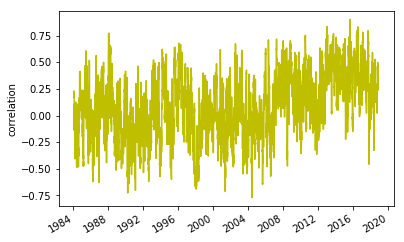

In [12]:
import pandas as pd
fx=pdr.DataReader('DEXJPUS', 'fred', start, end)
port=pd.concat([price.Close, fx], axis=1).dropna()
n=port.Close.pct_change().dropna()
f=port.DEXJPUS.pct_change().dropna()
f.rolling(window=20).corr(n).plot(color='y')
plt.ylabel('correlation')

Text(0,0.5,'^N225 index')

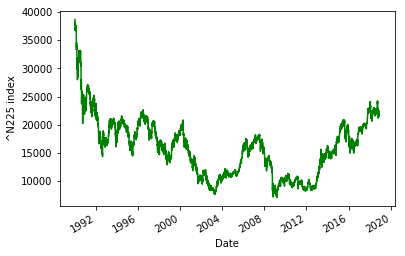

In [27]:
price=pdr.DataReader("^N225", 'yahoo', "1970/1/4", end)
price1=price.loc["1990/1/1":]
price1.Close.plot(color='g')
plt.ylabel('^N225 index')

In [28]:
print(price.resample('M').first().tail())

                    High           Low          Open         Close    Volume  \
Date                                                                           
2018-07-31  22312.250000  21784.480469  22233.800781  21811.929688   67100.0   
2018-08-31  22775.470703  22615.980469  22642.179688  22746.699219  100800.0   
2018-09-30  22820.480469  22684.429688  22819.169922  22707.380859   49900.0   
2018-10-31  24306.539062  24123.500000  24173.369141  24245.759766   65000.0   
2018-11-30  21906.410156  21628.449219  21906.410156  21687.650391  101900.0   

               Adj Close  
Date                      
2018-07-31  21811.929688  
2018-08-31  22746.699219  
2018-09-30  22707.380859  
2018-10-31  24245.759766  
2018-11-30  21687.650391  


In [29]:
print(price.resample('M').last().tail())

                    High           Low          Open         Close    Volume  \
Date                                                                           
2018-07-31  22678.060547  22352.210938  22472.119141  22553.720703  115400.0   
2018-08-31  22890.609375  22678.029297  22733.250000  22865.150391   68100.0   
2018-09-30  24286.099609  24021.269531  24080.009766  24120.039062   90700.0   
2018-10-31  21920.460938  21530.390625  21569.560547  21920.460938  105000.0   
2018-11-30  22362.199219  22231.960938  22274.970703  22351.060547       0.0   

               Adj Close  
Date                      
2018-07-31  22553.720703  
2018-08-31  22865.150391  
2018-09-30  24120.039062  
2018-10-31  21920.460938  
2018-11-30  22351.060547  


In [32]:
print(price.resample('M', loffset='1d').last().tail())

                    High           Low          Open         Close    Volume  \
Date                                                                           
2018-08-01  22678.060547  22352.210938  22472.119141  22553.720703  115400.0   
2018-09-01  22890.609375  22678.029297  22733.250000  22865.150391   68100.0   
2018-10-01  24286.099609  24021.269531  24080.009766  24120.039062   90700.0   
2018-11-01  21920.460938  21530.390625  21569.560547  21920.460938  105000.0   
2018-12-01  22362.199219  22231.960938  22274.970703  22351.060547       0.0   

               Adj Close  
Date                      
2018-08-01  22553.720703  
2018-09-01  22865.150391  
2018-10-01  24120.039062  
2018-11-01  21920.460938  
2018-12-01  22351.060547  


Text(0,0.5,'^N225 index')

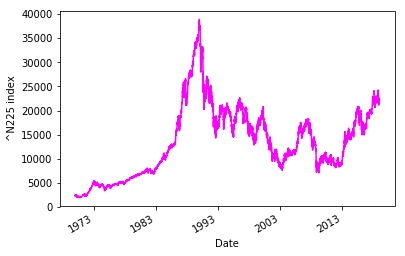

In [33]:
price.resample('A').Close.plot(color='magenta')
plt.ylabel("^N225 index")

In [35]:
import numpy as np
dp=np.log(price.Close).diff()
vol=dp.std() * np.sqrt(250)
print(vol, len(price))

0.20580509892188276 12048


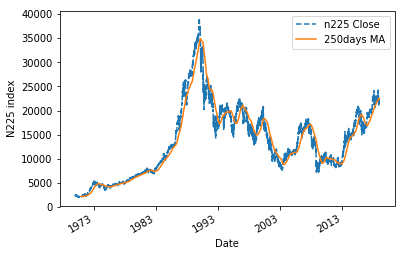

In [37]:
ma=pd.Series.rolling(price.Close,window=250).mean()
price.Close.plot(label='n225 Close', style='--')
ma.plot(label='250days MA')
plt.ylabel('N225 index')
plt.legend()

In [ ]:
(pd.Series.rolling(np.log(price.Close).diff().dropna(),window=250).std() * np.sqrt(250).plot())